# **Προετοιμασία περιβάλλοντος για ανάλυση δεδομένων**

In [ ]:
# @title Εισαγωγή Βιβλιοθηκών
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# **Περιγραφή των προς ανάλυση δεδομένων (Dataset description)**







In [ ]:
# @title <u>**Περιγραφή:**</u> <br>Σύνολο δεδομένων για την εκτίμηση του ακριβούς αριθμού των ενοίκων σε ένα δωμάτιο χρησιμοποιώντας πολλαπλούς μη παρεμβατικούς περιβαλλοντικούς αισθητήρες <br> όπως θερμοκρασία, φως, ήχος, CO2 και PIR.<br> **Instances:** 10129 <br> **Features:** 19 (περιλαμβάνεται ημερομηνία και ώρα)




# **Εισαγωγή δεδομένων**

In [3]:
# @title Εισαγωγή Συνόλου δεδομένων

df = pd.read_csv("Occupancy_Estimation.csv") #using pandas dataframe function to read the file format
df.head(10) #show the first 10 records

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
5,2017/12/22,10:52:14,25.00,24.81,24.56,25.44,121,34,54,40,0.13,0.06,0.06,0.07,390,0.165385,0,0,1
6,2017/12/22,10:52:45,25.00,24.75,24.56,25.44,120,34,54,40,1.39,0.32,0.43,0.06,390,0.076923,1,0,1
7,2017/12/22,10:53:15,25.00,24.81,24.56,25.44,121,34,54,41,0.09,0.06,0.09,0.05,390,-0.011538,0,0,1
8,2017/12/22,10:53:46,25.00,24.81,24.56,25.50,122,35,56,43,0.09,0.05,0.06,0.13,390,-0.100000,0,0,1
9,2017/12/22,10:54:17,25.00,24.81,24.56,25.50,101,34,57,43,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1


In [4]:
# @title Εμφάνιση διαστάσεων συνόλου δεδομένων

df.shape #print the records and the features (useful to understand the dataset's dimension)

(10129, 19)

In [5]:
# @title Μετατροπή των κελιών "Date" and "Time" σε "Datetime" για ευκολότερη διαχείριση των δεδομένων

df['DateTime'] = df['Date'] + ' ' + df['Time'] # Merge date and time columns into a single column
df['DateTime'] = pd.to_datetime(df['DateTime']) # Convert merged column to Pandas datetime
df.drop(['Date', 'Time'], axis=1, inplace=True)
first_column = df.pop('DateTime') #place it as first column for a better visualization
df.insert(0, 'DateTime', first_column)

df.head(10) #show the first 10 records

,DateTime,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017-12-22 10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017-12-22 10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017-12-22 10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017-12-22 10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017-12-22 10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
5,2017-12-22 10:52:14,25.00,24.81,24.56,25.44,121,34,54,40,0.13,0.06,0.06,0.07,390,0.165385,0,0,1
6,2017-12-22 10:52:45,25.00,24.75,24.56,25.44,120,34,54,40,1.39,0.32,0.43,0.06,390,0.076923,1,0,1
7,2017-12-22 10:53:15,25.00,24.81,24.56,25.44,121,34,54,41,0.09,0.06,0.09,0.05,390,-0.011538,0,0,1
8,2017-12-22 10:53:46,25.00,24.81,24.56,25.50,122,35,56,43,0.09,0.05,0.06,0.13,390,-0.100000,0,0,1
9,2017-12-22 10:54:17,25.00,24.81,24.56,25.50,101,34,57,43,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1


# **Οπτικοποίηση δεδομένων**



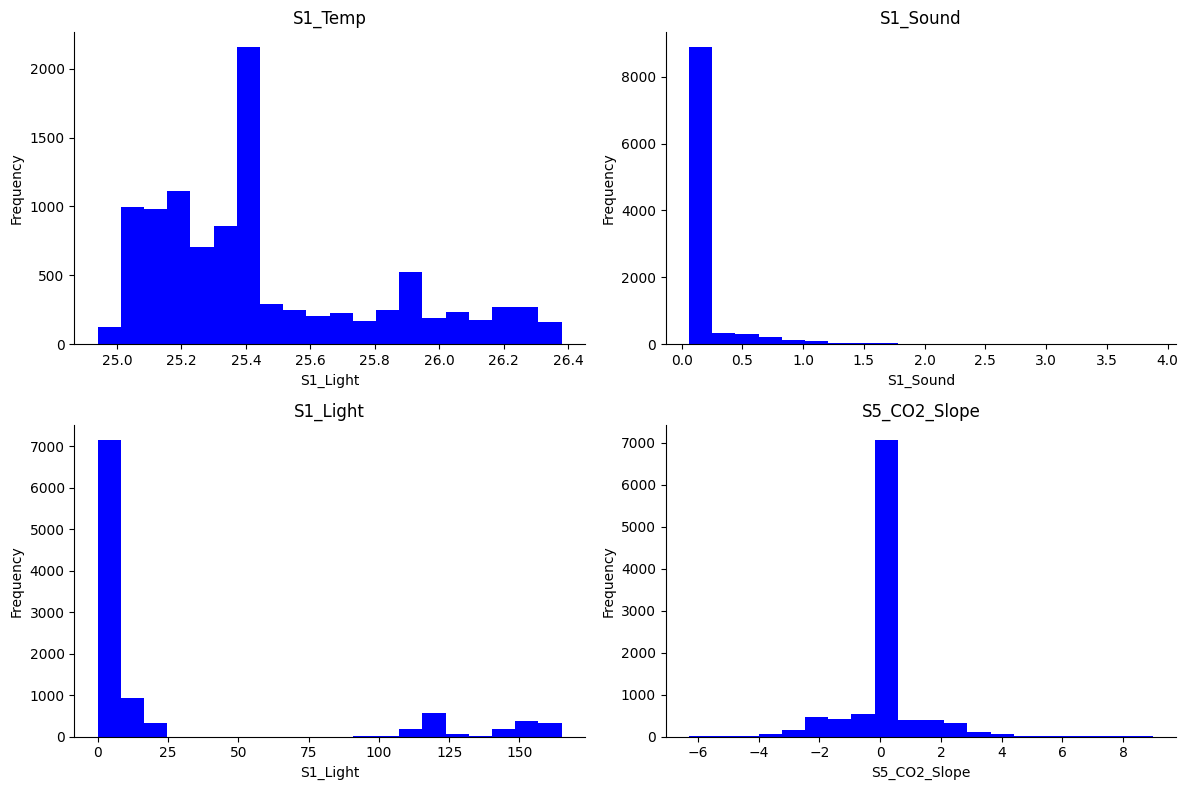

In [6]:
# @title Histograms

color_= "blue"
fig, axs = plt.subplots(2, 2, figsize=(12, 8)) # Create a figure and axis object with subplots

# Plot histogram for S1_Light
df['S1_Temp'].plot(kind='hist', bins=20, color=color_, title='S1_Temp', ax=axs[0, 0])
axs[0, 0].set_xlabel('S1_Light')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].spines[['top', 'right']].set_visible(False)

# Plot histogram for S1_Sound
df['S1_Sound'].plot(kind='hist', bins=20, color=color_, title='S1_Sound', ax=axs[0, 1])
axs[0, 1].set_xlabel('S1_Sound')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].spines[['top', 'right']].set_visible(False)

# Plot histogram for S1_Light again (just for example)
df['S1_Light'].plot(kind='hist', bins=20, color = color_, title='S1_Light', ax=axs[1, 0])
axs[1, 0].set_xlabel('S1_Light')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].spines[['top', 'right']].set_visible(False)

# Plot histogram for S5_CO2_Slope (assuming it's the correct column)
df['S5_CO2_Slope'].plot(kind='hist', bins=20, color=color_, title='S5_CO2_Slope', ax=axs[1, 1])
axs[1, 1].set_xlabel('S5_CO2_Slope')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].spines[['top', 'right']].set_visible(False)


plt.tight_layout() # Adjust layout
plt.show() # Show the plot


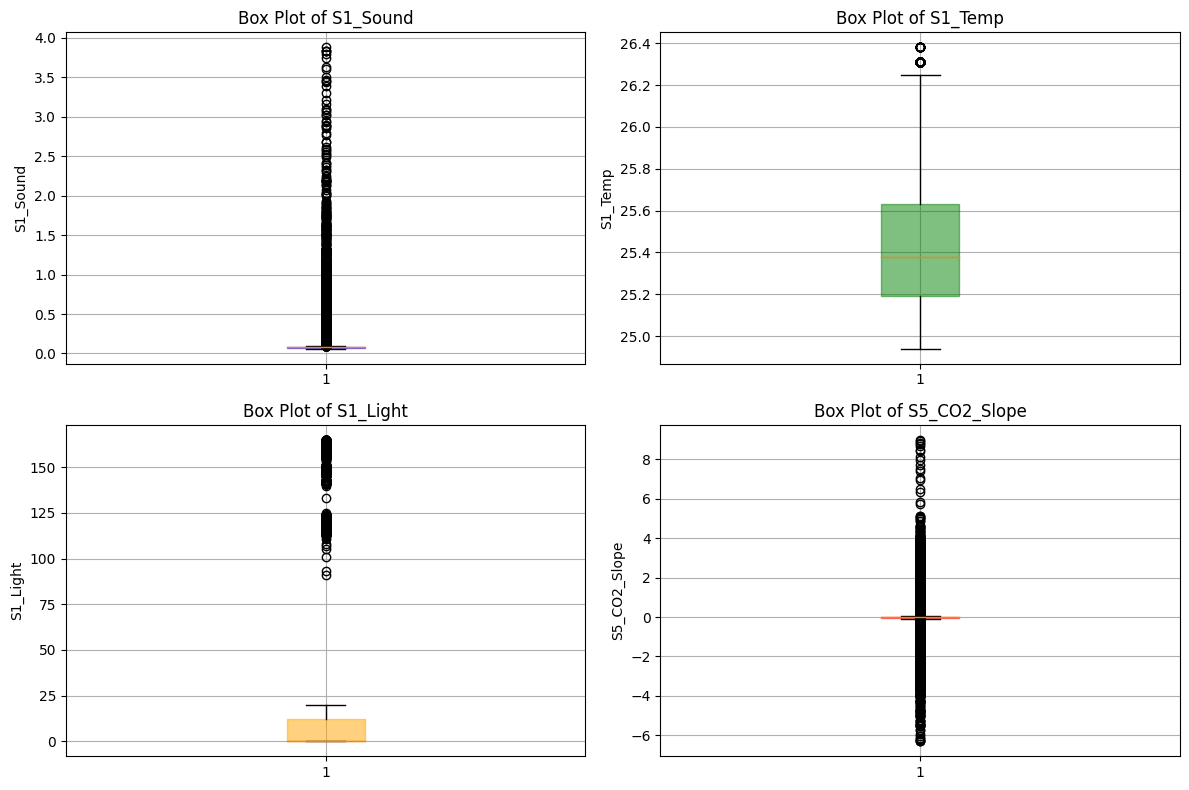

In [7]:
# @title Boxplots for features

fig, axs = plt.subplots(2, 2, figsize=(12, 8)) # Create a figure and axis object with subplots

# Colors for the box plots
colors = ['blue', 'green', 'orange', 'red']

# Create box plot for S1_Sound
axs[0, 0].boxplot(df['S1_Sound'], boxprops=dict(color=colors[0], facecolor=colors[0], alpha=0.5), patch_artist=True)
axs[0, 0].set_title('Box Plot of S1_Sound')
axs[0, 0].set_ylabel('S1_Sound')
axs[0, 0].grid(True)

# Create box plot for S1_Temp
axs[0, 1].boxplot(df['S1_Temp'], boxprops=dict(color=colors[1], facecolor=colors[1], alpha=0.5), patch_artist=True)
axs[0, 1].set_title('Box Plot of S1_Temp')
axs[0, 1].set_ylabel('S1_Temp')
axs[0, 1].grid(True)

# Create box plot for S1_Light
axs[1, 0].boxplot(df['S1_Light'], boxprops=dict(color=colors[2], facecolor=colors[2], alpha=0.5), patch_artist=True)
axs[1, 0].set_title('Box Plot of S1_Light')
axs[1, 0].set_ylabel('S1_Light')
axs[1, 0].grid(True)

# Create box plot for S5_CO2_Slope
axs[1, 1].boxplot(df['S5_CO2_Slope'], boxprops=dict(color=colors[3], facecolor=colors[3], alpha=0.5), patch_artist=True)
axs[1, 1].set_title('Box Plot of S5_CO2_Slope')
axs[1, 1].set_ylabel('S5_CO2_Slope')
axs[1, 1].grid(True)

plt.tight_layout() # Adjust layout
plt.show() # Show the plot




# **Καθαρισμός και επεξεργασία δεδομένων**



In [6]:
# @title Ευρετηριασμός συνόλου δεδομένων βάσει του χρόνου

df.set_index('DateTime', inplace=True) # Set Datetime as an index
df.head(20) #show the first 20 records

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
DateTime,,,,,,,,,,,,,,,,,
2017-12-22 10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
2017-12-22 10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2017-12-22 10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
2017-12-22 10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
2017-12-22 10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
2017-12-22 10:52:14,25.00,24.81,24.56,25.44,121,34,54,40,0.13,0.06,0.06,0.07,390,0.165385,0,0,1
2017-12-22 10:52:45,25.00,24.75,24.56,25.44,120,34,54,40,1.39,0.32,0.43,0.06,390,0.076923,1,0,1
2017-12-22 10:53:15,25.00,24.81,24.56,25.44,121,34,54,41,0.09,0.06,0.09,0.05,390,-0.011538,0,0,1
2017-12-22 10:53:46,25.00,24.81,24.56,25.50,122,35,56,43,0.09,0.05,0.06,0.13,390,-0.100000,0,0,1


In [7]:
# @title Eπαναδειγματοληψία για διάταξη των δεδομένων σε ισόποσα χρονικά διαστήματα
# Resample the data to equal time slots (e.g., every 3 minutes) and fill missing values with the previous value
resampled_df_3m = df.resample('3T').ffill()
resampled_df_3m

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
DateTime,,,,,,,,,,,,,,,,,
2017-12-22 10:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-22 10:51:00,25.00,24.75,24.50,25.44,121.0,34.0,53.0,40.0,0.43,0.11,0.08,0.06,390.0,0.519231,0.0,0.0,1.0
2017-12-22 10:54:00,25.00,24.81,24.56,25.50,122.0,35.0,56.0,43.0,0.09,0.05,0.06,0.13,390.0,-0.100000,0.0,0.0,1.0
2017-12-22 10:57:00,25.06,24.88,24.63,25.56,123.0,35.0,58.0,44.0,0.57,0.17,0.21,0.13,390.0,-0.630769,1.0,0.0,1.0
2017-12-22 11:00:00,25.13,24.88,24.63,25.50,123.0,35.0,58.0,44.0,0.13,0.04,0.06,0.06,390.0,-0.238462,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-11 08:48:00,25.13,25.06,24.63,25.25,6.0,7.0,33.0,21.0,0.08,0.05,0.06,0.08,345.0,0.000000,0.0,0.0,0.0
2018-01-11 08:51:00,25.13,25.06,24.69,25.19,6.0,7.0,33.0,22.0,0.08,0.05,0.05,0.08,345.0,0.000000,0.0,0.0,0.0
2018-01-11 08:54:00,25.13,25.06,24.69,25.25,6.0,7.0,33.0,21.0,0.07,0.05,0.06,0.08,345.0,0.000000,0.0,0.0,0.0


In [8]:
# @title  Υπολογισμός του ποσοστού των εκλειπόντων τιμών (missing values) για κάθε χαρακτηριστικό της πολυμεταβλητής χρονοσειράς
# Calculate the percentage of missing values for each column
column_missing_percentage = resampled_df_3m.isnull().mean() * 100

# Print the percentage of missing values for each column
print("Percentage of missing values for each column:")
print(column_missing_percentage)

Percentage of missing values for each column:
S1_Temp                 0.010455
S2_Temp                 0.010455
S3_Temp                 0.010455
S4_Temp                 0.010455
S1_Light                0.010455
S2_Light                0.010455
S3_Light                0.010455
S4_Light                0.010455
S1_Sound                0.010455
S2_Sound                0.010455
S3_Sound                0.010455
S4_Sound                0.010455
S5_CO2                  0.010455
S5_CO2_Slope            0.010455
S6_PIR                  0.010455
S7_PIR                  0.010455
Room_Occupancy_Count    0.010455
dtype: float64


In [9]:
# @title Αφαίρεση των εκλιπόντων τιμών (missing values)
def remove_missing_values(df):
  df.dropna(inplace=True)
  return df

resampled_df_3m = remove_missing_values(resampled_df_3m)
resampled_df_3m.head(20)

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
DateTime,,,,,,,,,,,,,,,,,
2017-12-22 10:51:00,25.00,24.75,24.50,25.44,121.0,34.0,53.0,40.0,0.43,0.11,0.08,0.06,390.0,0.519231,0.0,0.0,1.0
2017-12-22 10:54:00,25.00,24.81,24.56,25.50,122.0,35.0,56.0,43.0,0.09,0.05,0.06,0.13,390.0,-0.100000,0.0,0.0,1.0
2017-12-22 10:57:00,25.06,24.88,24.63,25.56,123.0,35.0,58.0,44.0,0.57,0.17,0.21,0.13,390.0,-0.630769,1.0,0.0,1.0
2017-12-22 11:00:00,25.13,24.88,24.63,25.50,123.0,35.0,58.0,44.0,0.13,0.04,0.06,0.06,390.0,-0.238462,0.0,0.0,1.0
2017-12-22 11:03:00,25.13,24.88,24.69,25.50,123.0,35.0,59.0,44.0,0.21,0.19,0.17,0.07,405.0,0.480769,1.0,0.0,1.0
2017-12-22 11:06:00,25.19,24.88,24.69,25.56,123.0,35.0,58.0,45.0,0.08,0.08,0.07,0.06,400.0,0.788462,0.0,0.0,1.0
2017-12-22 11:09:00,25.19,24.94,24.69,25.56,123.0,35.0,58.0,44.0,0.07,0.05,0.05,0.06,415.0,0.961538,0.0,0.0,1.0
2017-12-22 11:12:00,25.19,24.94,24.69,25.63,123.0,35.0,59.0,45.0,0.46,0.16,0.21,0.11,420.0,1.234615,1.0,0.0,1.0
2017-12-22 11:15:00,25.25,24.94,24.75,25.56,124.0,36.0,60.0,46.0,0.09,0.05,0.06,0.06,425.0,1.219231,0.0,0.0,1.0


In [10]:
# @title Εξαγωγή περιγραφικών στατιστικών για το υπο διερεύνηση σύνολο δεδομένων

resampled_df_3m.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,9564.000000,9564.000000,9564.000000,9564.000000,9564.00000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000
mean,25.136623,25.156312,24.751518,25.392361,9.79381,10.742158,34.291510,20.536386,0.088261,0.062705,0.085213,0.107995,371.041405,-0.002306,0.017670,0.014011,0.076537
std,0.215183,0.333229,0.236265,0.231454,23.64438,30.711239,25.706358,9.179279,0.138670,0.099188,0.168831,0.044916,97.021887,0.503936,0.131757,0.117542,0.423849
min,25.000000,24.750000,24.440000,25.000000,0.00000,0.000000,0.000000,0.000000,0.060000,0.040000,0.050000,0.050000,345.000000,-6.242308,0.000000,0.000000,0.000000
25%,25.060000,25.060000,24.690000,25.310000,6.00000,7.000000,34.000000,22.000000,0.070000,0.050000,0.070000,0.110000,350.000000,0.000000,0.000000,0.000000,0.000000
50%,25.060000,25.060000,24.690000,25.310000,6.00000,7.000000,34.000000,22.000000,0.070000,0.050000,0.070000,0.110000,350.000000,0.000000,0.000000,0.000000,0.000000
75%,25.060000,25.060000,24.690000,25.310000,6.00000,7.000000,34.000000,22.000000,0.070000,0.050000,0.070000,0.110000,350.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.500000,165.00000,257.000000,280.000000,74.000000,3.600000,2.910000,3.660000,1.520000,1270.000000,8.946154,1.000000,1.000000,3.000000


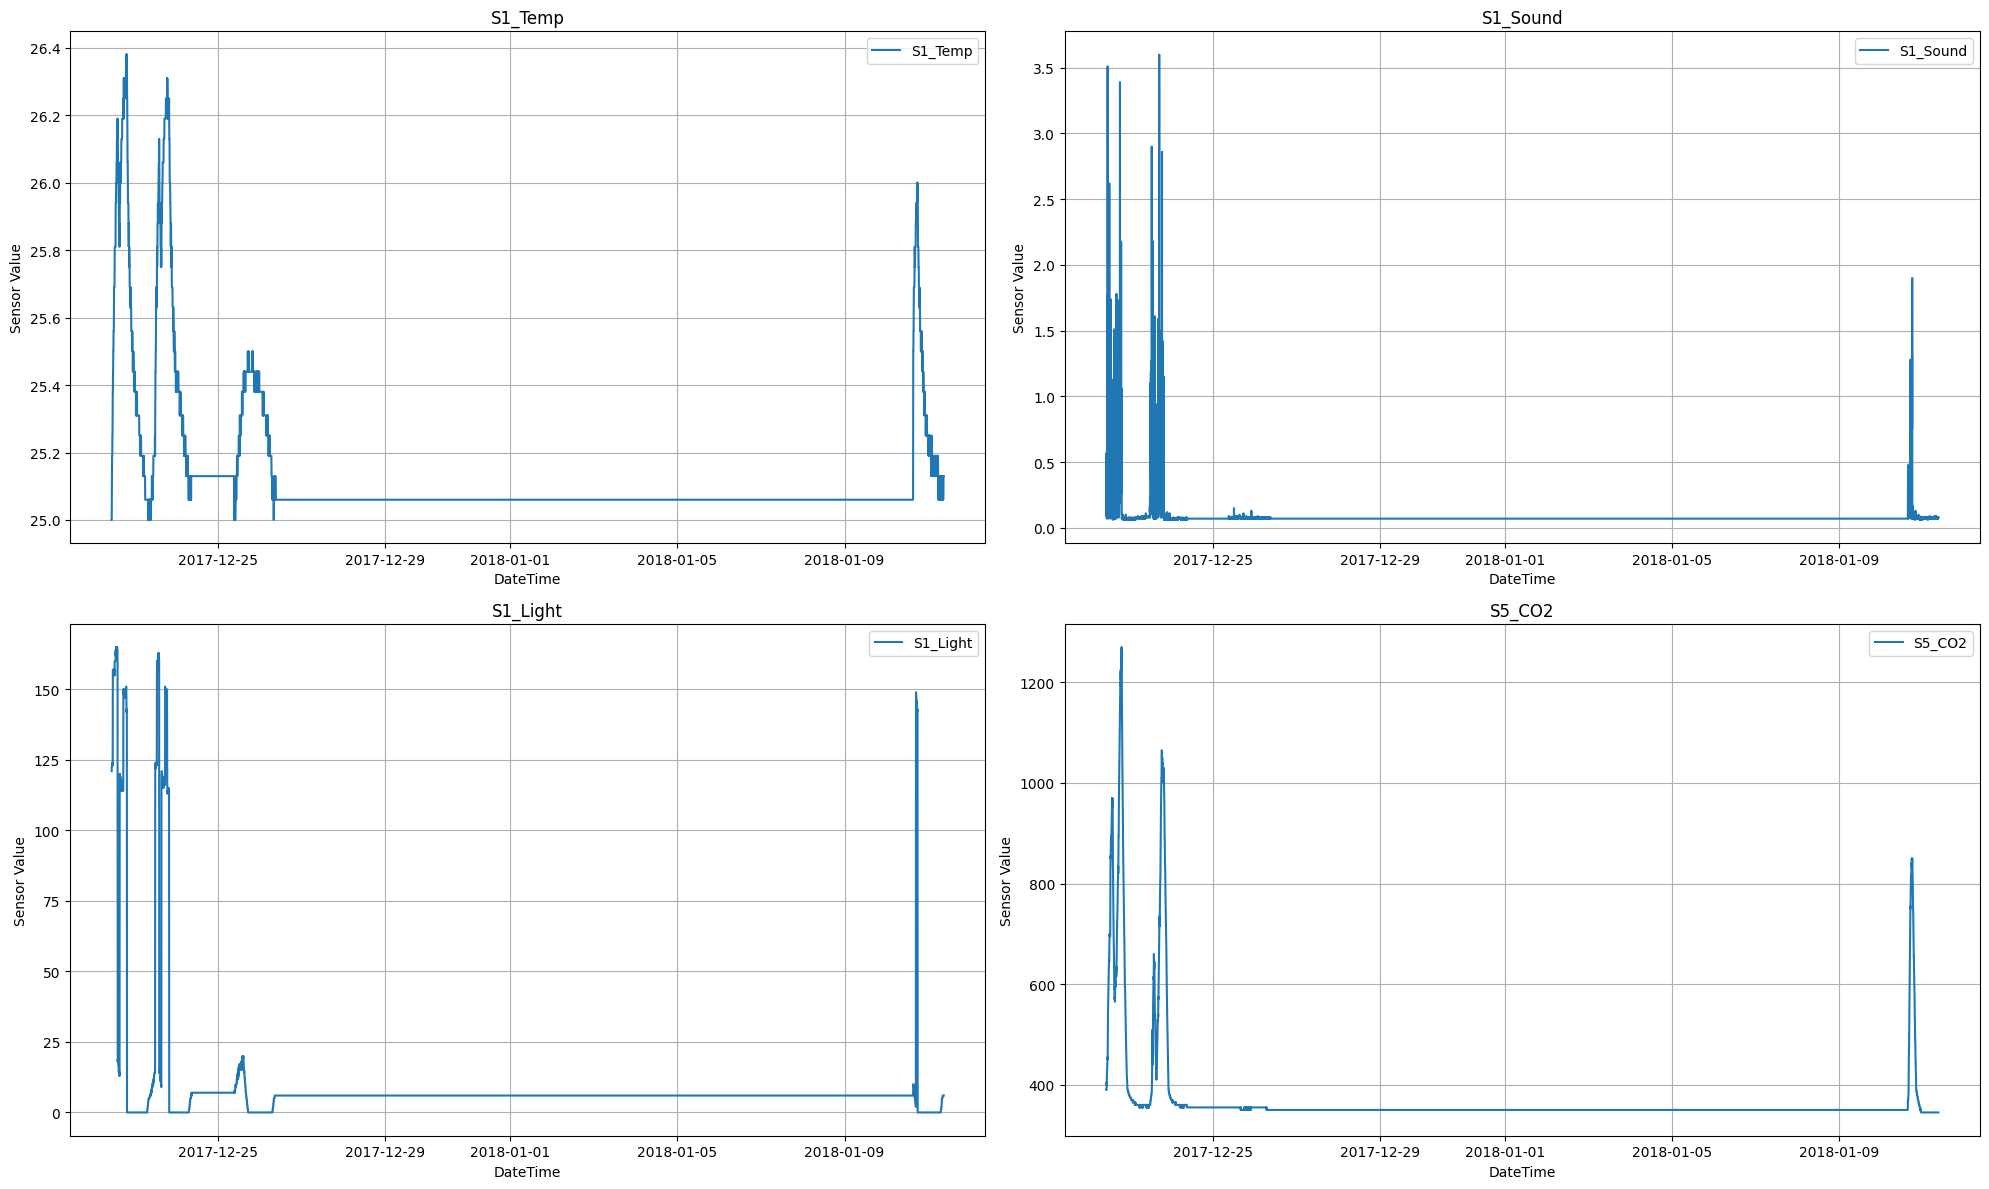

In [11]:
# @title Οπτικοποίηση των χαρακτηριστικών της  χρονοσειράς

fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # Create a 2x2 grid of subplots

# Plot S1_Temp
axs[0, 0].plot(resampled_df_3m.index, resampled_df_3m['S1_Temp'], label='S1_Temp', linestyle='-')
axs[0, 0].set_title('S1_Temp')
axs[0, 0].set_xlabel('DateTime')
axs[0, 0].set_ylabel('Sensor Value')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Plot S1_Sound
axs[0, 1].plot(resampled_df_3m.index, resampled_df_3m['S1_Sound'], label='S1_Sound', linestyle='-')
axs[0, 1].set_title('S1_Sound')
axs[0, 1].set_xlabel('DateTime')
axs[0, 1].set_ylabel('Sensor Value')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Plot S1_Light
axs[1, 0].plot(resampled_df_3m.index, resampled_df_3m['S1_Light'], label='S1_Light', linestyle='-')
axs[1, 0].set_title('S1_Light')
axs[1, 0].set_xlabel('DateTime')
axs[1, 0].set_ylabel('Sensor Value')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Plot S5_CO2
axs[1, 1].plot(resampled_df_3m.index, resampled_df_3m['S5_CO2'], label='S5_CO2', linestyle='-')
axs[1, 1].set_title('S5_CO2')
axs[1, 1].set_xlabel('DateTime')
axs[1, 1].set_ylabel('Sensor Value')
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot



In [12]:
# @title Εφαρμογή στατιστικού τεστ για εντοπισμό τάσης (Trend detection) - (Mann-Kendall) test

# Function that executes a  Mann-Kendall test for a given feature of a DataFrame to detect the trend.
def trend_detection(df, feature):
    # Extract time and feature values
    time = df.index
    values = df[feature]

    tau, p_value = kendalltau(time, values) # Perform Mann-Kendall trend test

    # Interpret the results
    if p_value < 0.05:
      print(f"Result: {feature} has trend")

      return "1"
    else:
        print(f"Result:{feature} has no trend")


        return "0"

# Function that performs differencing to eliminate the trend.
def differencing(df, feature):
  time_series = df[feature]
  detrended_series = time_series.diff().dropna()

  return detrended_series

# Function to perform joint operation to remove the trend for the entire dataset
def main_detrending_operation(df):
  for element in list(df.columns):
    if df[element].dtype == "float64" and not element == "Room_Occupancy_Count":
      if trend_detection(df, element) == "0":
        pass
      else:
        df[element] = differencing(df, element)

  return df


resampled_df_3m = main_detrending_operation(resampled_df_3m)
resampled_df_3m = remove_missing_values(resampled_df_3m)

Result: S1_Temp has trend
Result: S2_Temp has trend
Result: S3_Temp has trend
Result: S4_Temp has trend
Result: S1_Light has trend
Result:S2_Light has no trend
Result: S3_Light has trend
Result: S4_Light has trend
Result: S1_Sound has trend
Result: S2_Sound has trend
Result: S3_Sound has trend
Result: S4_Sound has trend
Result: S5_CO2 has trend
Result: S5_CO2_Slope has trend
Result: S6_PIR has trend
Result: S7_PIR has trend


In [13]:
# @title Εντοπισμός "Ακραίων τιμών" (outliers) - (εφαρμογή μετρικής z-score)
def detect_outliers_z_score(df):
    outliers = pd.DataFrame() #initialize a df to store the outliers

    for column in df.select_dtypes(include='float64').columns :
      if column != "Room_Occupancy_Count":
        z_scores = (df[column] - df[column].mean()) / df[column].std() # Calculate z-scores for the column

        threshold = 3  # Define threshold for outlier detection ( as it is needed )

        column_outliers = np.abs(z_scores) > threshold # Identify outliers for the column

        # Print rows with outliers for the column
        if column_outliers.any():
            print(f"Column '{column}' has outliers")

        outliers[column] = column_outliers # Save outliers for all columns

    return outliers


outliers = detect_outliers_z_score(resampled_df_3m)


Column 'S1_Temp' has outliers
Column 'S2_Temp' has outliers
Column 'S3_Temp' has outliers
Column 'S4_Temp' has outliers
Column 'S1_Light' has outliers
Column 'S2_Light' has outliers
Column 'S3_Light' has outliers
Column 'S4_Light' has outliers
Column 'S1_Sound' has outliers
Column 'S2_Sound' has outliers
Column 'S3_Sound' has outliers
Column 'S4_Sound' has outliers
Column 'S5_CO2' has outliers
Column 'S5_CO2_Slope' has outliers
Column 'S6_PIR' has outliers
Column 'S7_PIR' has outliers


# **Μοντελοποίηση και Αξιολόγηση**




In [ ]:
# @title Simple Moving Average and Linear Regression

# προετοιμασία δεδομένων
df_sma = resampled_df_3m.copy()

# Υλοποίηση στατιστικής μεθόδου SMA
columns_to_keep = ['S1_Temp']
df_sma = df_sma[columns_to_keep]
window = 3  # Window size for SMA
df_sma['SMA'] = df_sma['S1_Temp'].rolling(window=window).mean()
df_sma = remove_missing_values(df_sma)


# Διαχωρισμός train και test υποσυνόλων δεδομένων
X = df_sma[['SMA']]
y = df_sma['S1_Temp']
train_size = 0.8
train_index = int(len(df_sma) * train_size)
X_train, X_test = X.iloc[:train_index], X.iloc[train_index:]
y_train, y_test = y.iloc[:train_index], y.iloc[train_index:]

# Εκπάιδευση Μοντέλου Γραμμικής Παλινδρόμησης με εξαρτημένη μεταβλητή S1_Temp και ανεξάρτηση μεταβλητή SMA
model = LinearRegression()
model.fit(X_train, y_train)

# Υπολογισμός προβλέψεων για test set
y_test_pred = model.predict(X_test)

# Αξιολόγηση: Υπολογισμός μετρικών (mse, rmse, mape)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Eκτύπωση μετρικών
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Οπτικοποίηση προβλέψεων σε σχέση με τις πραγματικές προος εξέταση τιμές (test set)
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, label='Actual', color='blue')
plt.plot(X_test.index, y_test_pred, label='Forecasted', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Linear Regression Forecast on Test Set')
plt.legend()
plt.grid(True)
plt.show()

Result:S1_Temp has no trend
Mean Squared Error (MSE): 0.00120855949895617
Root Mean Squared Error (RMSE): 0.03476434234896685
Mean Absolute Error (MAE): 0.013716075156576276


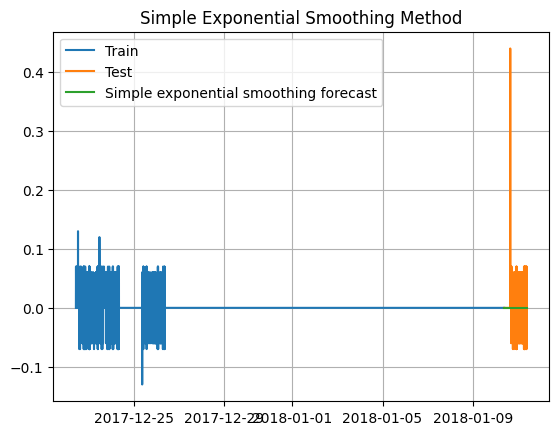

In [36]:
# @title Simple Exponential Smoothing

# προετοιμασία δεδομένων
df_ses = resampled_df_3m.copy()
columns_to_keep = ['S1_Temp']
df_ses = df_ses[columns_to_keep]

#Ελέγχουμε συνεχίζει να υπάρχει τάση στη υπο μελέτη χρονοσειρά
trend_detection(df_ses, "S1_Temp")

# Διαχωρισμός train και test υποσυνόλων δεδομένων
train_len = int(0.80*len(df_ses))
train = df_ses[0:train_len]
test = df_ses[train_len:]


# Υλοποίηση SimpleExpSmoothing (δεν υπάρχει τάση στην υπο έρευνα χρονοσειρά) επίσης μπορεί να δοκίμαστεί ο συντελεστής alpha με διάφορες τιμές [0.1, 0.9]
model = SimpleExpSmoothing(train['S1_Temp'])
model_fit = model.fit(smoothing_level=0.8,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))


# Αξιολόγηση: Υπολογισμός μετρικών (mse, rmse, mape)
mse = mean_squared_error(test, y_hat_ses['ses_forecast'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, y_hat_ses['ses_forecast'])
mape = np.mean(np.abs((test - y_hat_ses['ses_forecast']) / test)) * 100

# Eκτύπωση μετρικών
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


plt.grid()
plt.plot(train['S1_Temp'], label='Train')
plt.plot(test['S1_Temp'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()


In [ ]:
# @title Simple Exponential Smoothing (με επαναδειγματισμό)

# Επαναδειγματισμός και καταγραφή τιμών ανα μέρα
df_ses_day = df.resample('H').ffill()
df_ses_day = remove_missing_values(df_ses_day)

# προετοιμασία δεδομένων
columns_to_keep = ['S1_Temp']
df_ses_day = df_ses_day[columns_to_keep]
df_ses_day = remove_missing_values(df_ses_day)

#
trend_detection(df_ses_day, "S1_Temp")

#  Ελέγχουμε αν υπάρχει τάση στη υπο μελέτη χρονοσειρά και σε θετική περίπτωση εφαρμόζεται διαφοροποίηση (1st order differencing) και απαλοιφή εκλειπόντων τιμών (missing values)
df_ses_day = main_detrending_operation(df_ses_day)
df_ses_day = remove_missing_values(df_ses_day)

#Ελέγχουμε εκ νέου αν υπάρχει τάση στη υπο μελέτη χρονοσειρά
trend_detection(df_ses_day, "S1_Temp")


# Διαχωρισμός train και test υποσυνόλων δεδομένων
train_len_ses_day = int(0.80*len(df_ses_day))
train_day = df_ses_day[0:train_len_ses_day]
test_day = df_ses_day[train_len_ses_day:]

# Υλοποίηση SimpleExpSmoothing (δεν υπάρχει τάση στην υπο έρευνα χρονοσειρά) επίσης μπορεί να δοκίμαστεί ο συντελεστής alpha με διάφορες τιμές [0.1, 0.9]
model = SimpleExpSmoothing(train_day['S1_Temp'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses_day = test_day.copy()
y_hat_ses_day['ses_forecast'] = model_fit.forecast(len(test_day))


# Αξιολόγηση: Υπολογισμός μετρικών (mse, rmse, mape)
mse = mean_squared_error(test_day, y_hat_ses_day['ses_forecast'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_day, y_hat_ses_day['ses_forecast'])
mape = np.mean(np.abs((test_day - y_hat_ses_day['ses_forecast']) / test_day)) * 100

# Eκτύπωση μετρικών
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


plt.grid()
plt.plot(train_day['S1_Temp'], label='Train', color="blue")
plt.plot(test_day['S1_Temp'], label='Test', color="orange")
plt.plot(y_hat_ses_day['ses_forecast'], color="green",label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method (records taken hourly)')
plt.show()


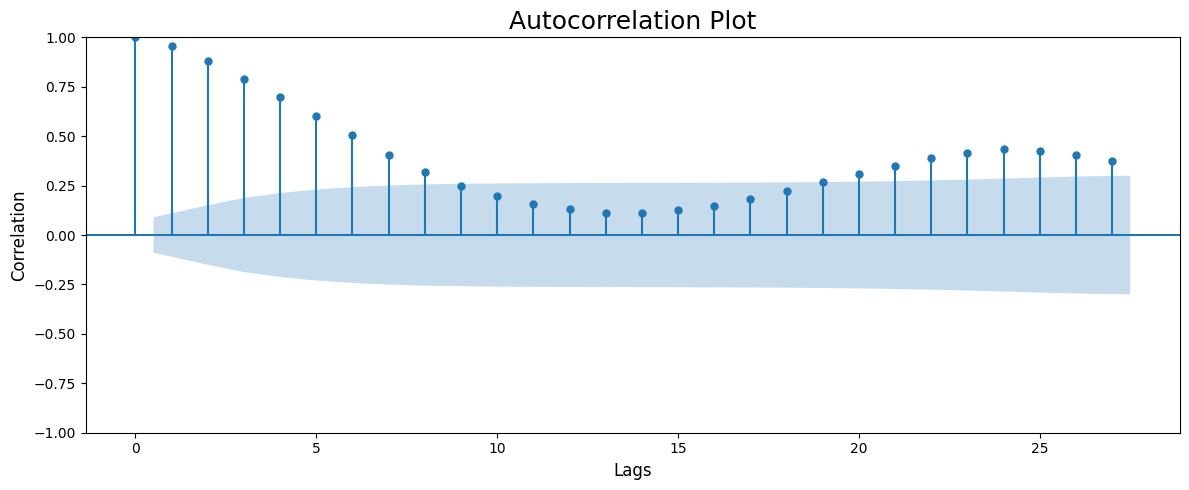

In [50]:
# @title ARIMA Modelling kai υπόδειγμα διάγραμματος αυτοσυσχέτησης (applied: 1 time-series diffrence)

# @title ARIMA Model

# προετοιμασία δεδομένων
df_arima = df.copy()
columns_to_keep = ['S1_Temp']
df_arima = df_arima[columns_to_keep]

# επαναδειγματισμός δεδομένων (ανά ώρα) - διαπιστώθηκε ότι γίνονται καλύτερες προβλέψεις
resampled_df_Η_arima = df_arima.resample('H').ffill()
resampled_df_Η_arima = remove_missing_values(resampled_df_Η_arima)


# οπτικοποίηση διαγράμματος αυτοσυσχέτισης για καλύτερη κατανόηση του φαινομένου της αυτοσυσχέτισης στην υπο μελέτη χρονοσειρά μας, και συνεισφορά
# στο προς υλοποίηση μοντέλο ARIMA

plt.rc("figure", figsize=(12,5))
plot_acf(resampled_df_Η_arima)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Autocorrelation Plot', fontsize=18)
plt.tight_layout()
plt.show()




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Mean Squared Error (MSE): 0.02703686885840521
Root Mean Squared Error (RMSE): 0.16442891734243467
Mean Absolute Error (MAE): 0.09965402096148974


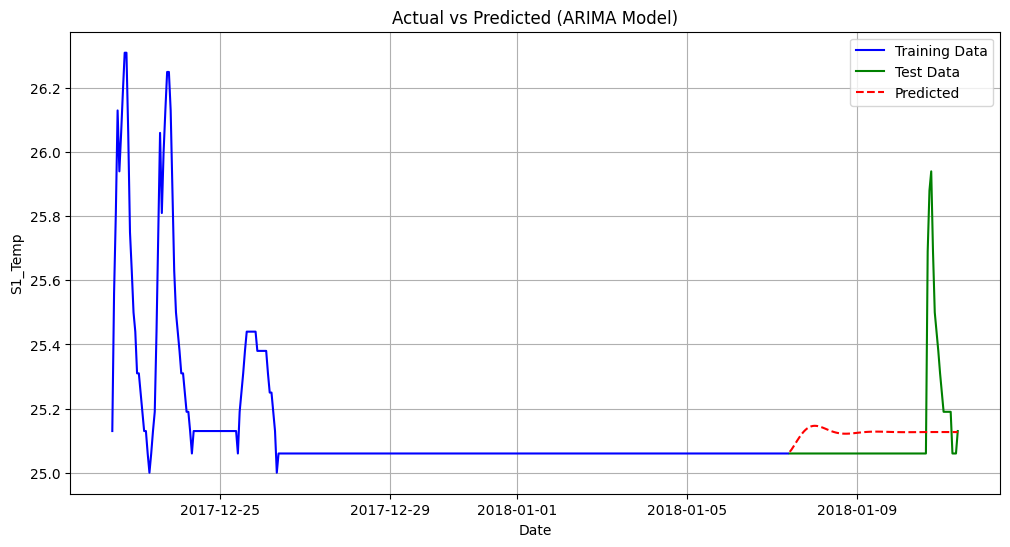

In [151]:

# Διαχωρισμός train και test υποσυνόλων δεδομένων

train_size = 0.8
train_index = int(len(resampled_df_Η_arima) * train_size)
train = resampled_df_Η_arima[:train_index]
test = resampled_df_Η_arima[train_index:]

# Υλοποίηση ARIMA model (p,d, q) όπου p: βαθμός αυτοσυσχέτισης, οπου d: βαθμός διαφοροποίησης, όπου q: το μέγεθος του κινούμενου μέσου παραθύρου
model = ARIMA(train, order=(3, 0, 3))
model_fit = model.fit()

# Υπολογισμός προβλέψεων για test set

start_index = len(train)
end_index = start_index + len(test) - 1
y_pred = model_fit.predict(start=start_index, end=end_index, typ='levels')


# Αξιολόγηση: Υπολογισμός μετρικών (mse, rmse, mape)
mse = mean_squared_error(test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, y_pred)
mape = np.mean(np.abs((test - y_pred) / test)) * 100

# Eκτύπωση μετρικών
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Οπτικοποίηση προβλέψεων σε σχέση με τις πραγματικές προος εξέταση τιμές (test set)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('S1_Temp')
plt.title('Actual vs Predicted (ARIMA Model)')
plt.legend()
plt.grid(True)
plt.show()
